In [108]:
from collections import namedtuple, Counter
import re

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFont, ImageDraw
import tweepy
from wordcloud import WordCloud, STOPWORDS

from twitter_secrets import API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

In [109]:
Tweet = namedtuple('Tweet', 'id text created likes rts')

In [110]:
TWITTER_ACCOUNT = 'dtizzlenizzle'

In [111]:
# Make and API object
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)
api

In [112]:
# Function to get all our tweets
def get_tweets():
    for tw in tweepy.Cursor(api.user_timeline,
                           screen_name=TWITTER_ACCOUNT,
                           exclude_replies=False,
                           include_rts=True).items():
        yield Tweet(tw.id, tw.text, tw.created_at, tw.favorite_count, tw.retweet_count)

In [113]:
tweets = list(get_tweets())

In [114]:
len(tweets)

245

In [115]:
excl_rts = [tweet for tweet in tweets if not tweet.text.startswith('RT')]

In [116]:
top_10 = sorted(excl_rts, key=lambda tw: (tw.likes + tw.rts)/2, reverse=True)[:10]

In [117]:
top_10

[Tweet(id=1068739204971208704, text='Day 63: #100DaysOfCode progress: today I played around more with music21, and submitted a few issues  #Python @pybites @talkpython', created=datetime.datetime(2018, 12, 1, 5, 30, 57), likes=13, rts=14),
 Tweet(id=1042617180553207809, text='Day 2: #100DaysOfCode progress: today I coded my raspberry pi to send me a notification when it hears my dog barkin… https://t.co/YrGgKmCnQS', created=datetime.datetime(2018, 9, 20, 3, 31, 21), likes=19, rts=4),
 Tweet(id=1070560394484346881, text='Day 66: #100DaysOfCode progress: today I worked on catching up on some talk python trainings, looking at feedparser… https://t.co/1qmndVnBse', created=datetime.datetime(2018, 12, 6, 6, 7, 42), likes=12, rts=10),
 Tweet(id=1060167063363379201, text='If this driver goes on @TalkPython I think we all know what the answer to Michael’s first question would be https://t.co/qKuE1UrUvr', created=datetime.datetime(2018, 11, 7, 13, 48, 19), likes=20, rts=2),
 Tweet(id=10690977504

In [118]:
hashtag = re.compile(r'#[-_A-Za-z0-9]+')
mention = re.compile(r'@[-_A-Za-z0-9]+')

all_tweets = ' '.join([tw.text.lower() for tw in tweets])
all_tweets_excl_rt = ' '.join([tw.text.lower() for tw in tweets if not tw.text.startswith('RT')])

hashtags = hashtag.findall(all_tweets)
cnt = Counter(hashtags)
cnt.most_common(20)

[('#100daysofcode', 74),
 ('#python', 29),
 ('#accounting', 3),
 ('#novalabssign', 3),
 ('#thanksgivukkah', 2),
 ('#warriorgames', 2),
 ('#alkalinetrio', 2),
 ('#hacktoberfest', 1),
 ('#digitalocean', 1),
 ('#github', 1),
 ('#opensource', 1),
 ('#inboxzero', 1),
 ('#102', 1),
 ('#rocknoceros', 1),
 ('#jamminjava', 1),
 ('#amazon', 1),
 ('#alexa', 1),
 ('#isaca', 1),
 ('#pythonbytes', 1),
 ('#ficpa', 1)]

In [119]:
mentions = mention.findall(all_tweets)
cnt = Counter(mentions)
cnt.most_common(20)

[('@talkpython', 29),
 ('@pybites', 26),
 ('@pythonbytes', 9),
 ('@dabeaz', 8),
 ('@mkennedy', 6),
 ('@python4cpas', 6),
 ('@itswillyferrell', 6),
 ('@bspeed_media', 4),
 ('@jakevdp', 3),
 ('@kennethreitz', 3),
 ('@gvanrossum', 3),
 ('@brianokken', 2),
 ('@conanobrien', 2),
 ('@intuitaccts', 2),
 ('@_johnwheeler', 2),
 ('@decomouse', 2),
 ('@tmfansupport', 2),
 ('@alisonleiby', 2),
 ('@thedailyshow', 2),
 ('@omgthatspunny', 2)]

In [120]:
guitar_mask = np.array(Image.open('guitar.jpg'))
stopwords = set(STOPWORDS)

stopwords.add('co')
stopwords.add('https')

wc = WordCloud(background_color='white', max_words=2000, mask=guitar_mask, stopwords=stopwords)

wc.generate(all_tweets_excl_rt)

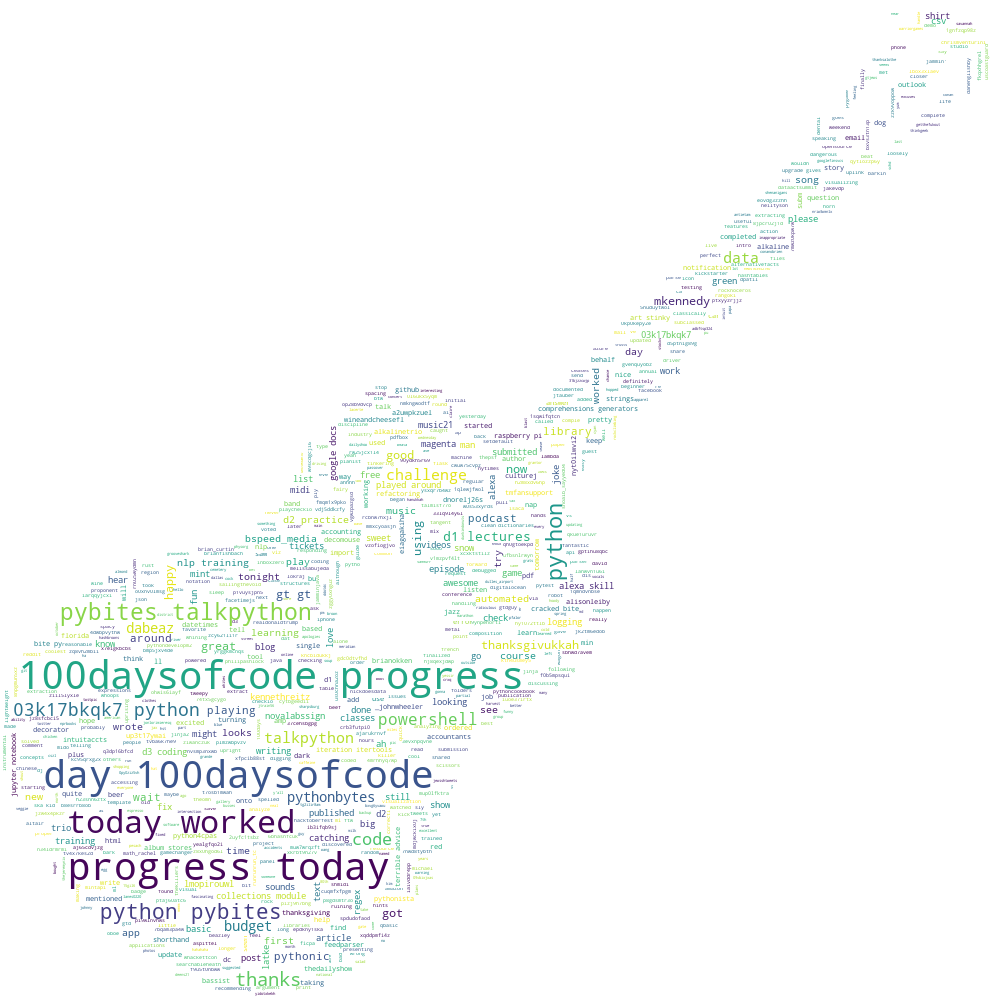

In [121]:
wc.to_image()

In [124]:
def get_tweets_by_hashtag(hashtag, num_tweets=100):
    for tw in tweepy.Cursor(api.search,
                           q=f'#{hashtag}',
                           exclude_replies=False,
                           include_rts=False).items(num_tweets):
        yield Tweet(tw.id, tw.text, tw.created_at, tw.favorite_count, tw.retweet_count)

In [125]:
# python_search = get_tweets_by_hashtag('python', 50)

In [126]:
# python_1000 = list(python_search)

In [133]:
def generate_cloud_from_hashtag(hashtag, num_tweets=500):
    # Get all tweets from the hashtag
    tweets = get_tweets_by_hashtag(hashtag, num_tweets)
    
    # Combine all tweet text into one string
    all_tweets = ' '.join([tw.text.lower() for tw in tweets])
    
    # Create mask from the name
    font = ImageFont.truetype(font='ARLRDBD', size=200)
    width = 200 + 100 * len(hashtag)
    img = Image.new('RGB', (width, 300), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), hashtag, (0, 0, 0), font=font)
    img.save('temp.jpg')
    
    # Create a wordcloud
    mask = np.array(Image.open('temp.jpg'))
    stopwords = set(STOPWORDS)

    stopwords.add('co')
    stopwords.add('https')

    wc = WordCloud(background_color='white', max_words=5000, mask=mask, stopwords=stopwords)

    wc.generate(all_tweets)
    return wc

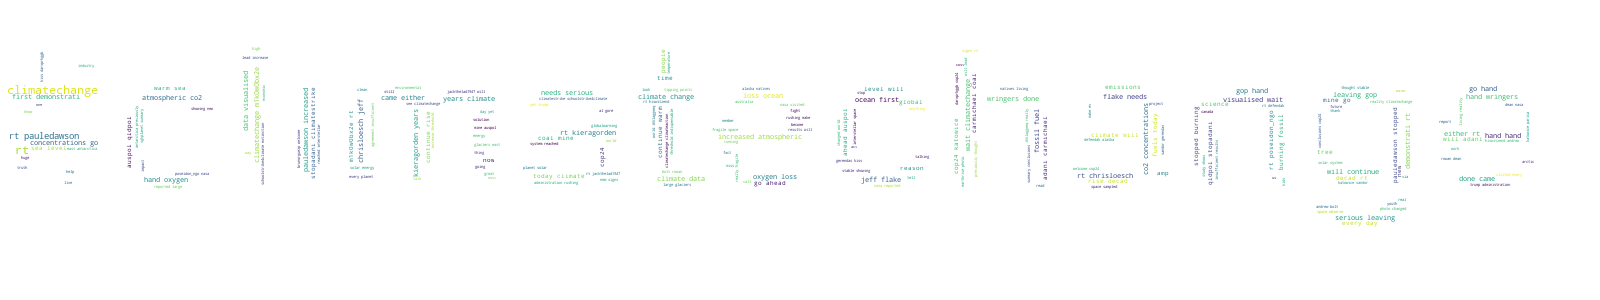

In [134]:
wc = generate_cloud_from_hashtag('#climatechange', 500)
wc.to_image()

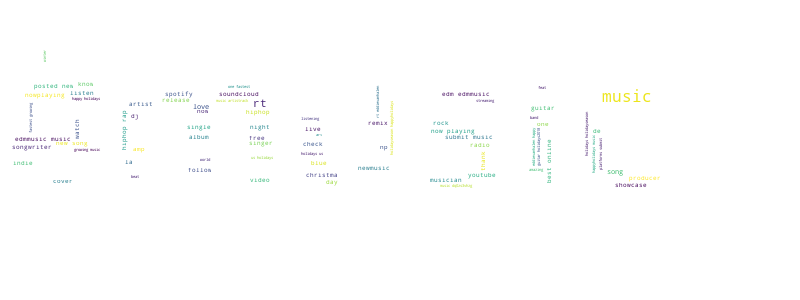

In [135]:
wc = generate_cloud_from_hashtag('#music', 500)
wc.to_image()

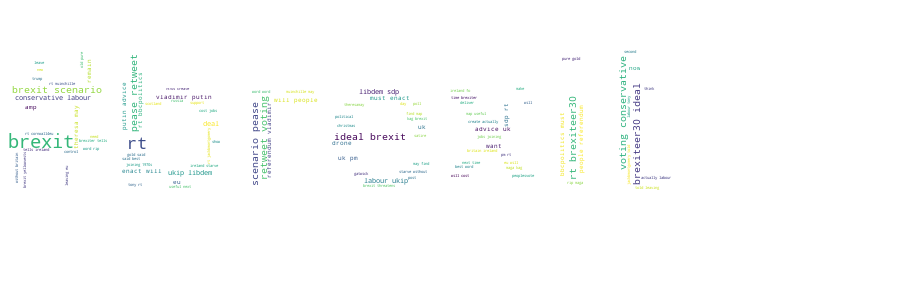

In [136]:
wc = generate_cloud_from_hashtag('#brexit', 500)
wc.to_image()